# Exercise 2: Understanding the fourier transform

In exercise 1 we learned about the magnitude spectrum, which is a graphical representation of the frequency content of a signal, and how it can be interpreted to gather information about for instance the pitch of an an audio signal. In this exercise we will take a closer look at the main mathematical formula which allows us to find the magnitude spectrum of a signal in the first place: the Fourier Transform.

## Motivation

<div style="width: 100%;">
    <img src="Figurer/Tide_illustrated.png" style="float: right; width: 25%" />
    <div style="width: 70%">
        The fourier transform is a challenging topic to understand, and it is often easy to get lost in the "pure mathematics" when first approaching the subject. In this exercise, we will take a practical and problem-oriented approach to understanding the concepts of transforms by tackling an old problem which the Fourier Transform was instrumental in solving: predicting the tides.<!--following in the footsteps of mathematician and engineer William Thompson (Lord Kelvin), who successfully applied the principles of the fourier transform to create a tidal prediction machine in the early 20th century. -->
</p>
        <p>Tidal patterns are primarily governed by gravitational pull of the moon and sun, with the moon dominating due to it's spatial proximity to the earth. In principle, the sea level $h$ at a given point on earth as a function of time $t$ can be decomposed into a number of sinusoidal functions with periods governed by the relative motion of the sun, the moon and the earth. <!--The frequencies of the two most significant components will be twice per solar day ($T = 12$h), and twice per lunar day ($T=12.42$h). The reason for frequencies being twice per day and not once per day is related to how water collects both at the sublunar and antipodal side of the planet (as shown in the figure).--></p>
    <p>If the frequency, phase and magnitude of these sinusoidal components are known, it should be possible to predict the tides for any given future point in time $t$. As such, tidal prediction becomes a matter of identifying the properties of each sine wave present in the tidal function $h(t)$. <!--Since we already know what frequencies of sinusoidal functions <i>should</i> be present in the tidal patterns, all that remains in theory is estimating the magnitude and phase values.--> To do this, we need to start by somehow <i><b>decomposing</b></i> historical data into a finite set of wave functions.</p>
    </div>
</div> 

### The data

What you see below is a Python script which will download recorded sea level data for Ålesund between `from_date` and `to_date` from [kartverket.no](https://kartverket.no/til-sjos/se-havniva/resultat?id=192945&location=%C3%85lesund#waterlevel-tab), and plot a curve showing the sea level changes over time. Our goal in this exercise is to find a mathematical formula which describes, to an extent, the sea level changes seen in the data, and use this mathematical formula to make predictions of future tide levels. By the end of the exercise, we can also evaluate our prediction´s accuracy by comparing it to the "official" forecast available from kartverket.



C:\Users\Jalma\Documents\GitHub\AIS2201_Exercises\Exercise_2


Text(0, 0.5, 'Sea level (cm)')

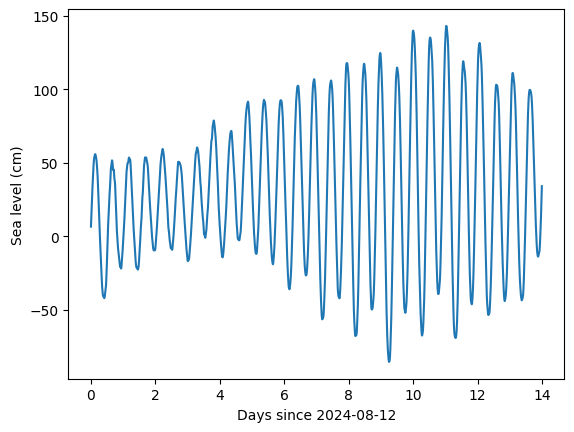

In [1]:
import os
print(os.getcwd())

from module2functions import getTideObservations
import matplotlib.pyplot as plt
import numpy as np

T = 14 # Number of days before today to collect data from
measurements_cm, meas_freq, from_date, to_date = getTideObservations(T)

days = np.linspace(0, T, T*meas_freq, endpoint=False)
plt.plot(days, measurements_cm)
plt.xlabel(f"Days since {from_date}")
plt.ylabel(f"Sea level (cm)")

However, before we dive into the tidal data<!-- which is publically available from [kartverket.no](https://kartverket.no/til-sjos/se-havniva/resultat?id=192945&location=%C3%85lesund#waterlevel-tab)-->, we will begin by constructing and decomposing simpler signals based on pure sine waves. While not quite as exciting, it will help make the fundamental principles of fourier analysis clearer, so we can successfully employ the principles on a more complex signal by the end of the exercise.

<!--
All 4 tasks in this assigment will focus on analyzing historical sea level data recorded in Ålesund, which is publically available from [kartverket.no](https://kartverket.no/til-sjos/se-havniva/resultat?id=192945&location=%C3%85lesund#waterlevel-tab). Through the course of these tasks we will explore the underlying mathematical principles which enable fourier series decomposition, and use to produce our own tidal predictions based on fourier analysis. The accuracy of our predictions can be evaluated by comparing with the official predictions 


-->
<br>


## Overview
<!--
| |Task|Topics|Points|
|--:|:--|:--| --:|
|1|A trial-and-error approach| *Why do fourier-series decomposition?* | $20$ |
|2|Frequency Mixing| *the modulation operation in time and frequency*| $30$ |
|3|Complex Frequency Shifting| *complex functions in python, the two-sided frequency spectrum* | $30$ |
|4|Constructing a tide-level prediction| *fourier series reconstruction* | $20$ |
-->

| |Task|Topics|Points|
|--:|:--|:--| --:|
|1|[The vector addition theorem](1_adding_sines.ipynb)| *Adding two sine-waves.* | $20$ |
|2|[Decomposition of a single sine wave](2_sinusoids_decomposition.ipynb)| *frequency mixing, two-sided frequency spectrum*| $20$ |
|3|[Complex Frequency Shifting](3_frequency_shifting.ipynb)| *complex functions in python, complex fourier coefficients* | $30$ |
|4|[Constructing a tide prediction](4_tide_prediction.ipynb)| *fourier series decomposition & reconstruction* | $30$ |